In [80]:
from sklearn.preprocessing import scale, minmax_scale, robust_scale

#데이터 구성 패키지
import pandas as pd

#행렬 연산 패키지
import numpy as np

#데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt

#데이터 시각화(추세 등) 패키지
import seaborn as sns

#통계 분석 패키지
from scipy import stats
import scipy.stats

#jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import GradientBoostingRegressor


from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler


from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm

from datetime import datetime
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier as GBC

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [81]:
matplotlib.rc('font', family = 'NanumGothic')
plt.rc("font",family="NanumGothic")

# 인공신경망 

유방암 결과를 분류하는 신경망 모델을 만들고 predict method를 이용하여 목표변수 범주를 예측하라. 그리고 모델의 정확도와 confusion matrix를 구하라.
데이터 : 유방암.CSV(변수: 31개, 자료 수: 569개)
 -.목표변수(diagnosis, 0: Malignant(악성,357개), 1: Benign(양성,212개) 
        
※ 데이터는 ( train(0.4) : validation(0.3) : test(0.3) )의 비율로 분할 (train_test_split 활용)
 0. train_test_split 함수를 이용하여 train:test로 데이터 분할. 분할된 train 데이터를 재 분할하여 validation 데이터로 사용
 1. train 데이터: 모델 훈련 
 2. validation 데이터: 최적의 parameter 찾기(과정의 [연습/실습]에서 test 데이터 역할)
 3. test 데이터: 2에서 찾은 최적의 parameter를 이용하여 만든 모델로 최종 성능 확인(단 한 번만 사용할 것)

In [82]:
df_raw = pd.read_csv("data/유방암.csv",engine = "python")
df_raw.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [83]:
df_raw.shape

(569, 31)

In [84]:
df_raw.isnull().sum()

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [85]:
df_raw_x =df_raw.drop("diagnosis",axis=1, inplace=False)
df_raw_y =df_raw["diagnosis"]

In [86]:
# 데이터분할 4:3:3
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,df_raw_y,test_size = 3/10,random_state =1234)
df_train_x, df_val_x, df_train_y, df_val_y = train_test_split(df_train_x,df_train_y,test_size = 3/7,random_state =1234)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("val data X size : {}".format(df_val_x.shape))
print("val data Y size : {}".format(df_val_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (227, 30)
train data Y size : (227,)
val data X size : (171, 30)
val data Y size : (171,)
test data X size : (171, 30)
test data Y size : (171,)


In [87]:
nn_uncustomized =MLPClassifier(random_state=1234)
nn_uncustomized.fit(df_train_x,df_train_y)

print("Accuracy on training set : {:.3f}".format(nn_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on val set : {:.3f}".format(nn_uncustomized.score(df_val_x, df_val_y)))

Accuracy on training set : 0.934
Accuracy on val set : 0.912


현재 모델의 정확도는 train 93.4%, test 91.2% 이다. 

In [88]:
nn_uncustomized

MLPClassifier(random_state=1234)

In [89]:
train_accuracy =[]; val_accuracy=[]
#은닉층 변경 hidden layer
para_hidden=[20 * hidden for hidden in range(1,9)]
for v_hidden in para_hidden :
    nn=MLPClassifier(hidden_layer_sizes=v_hidden,random_state=1234)
    nn.fit(df_train_x,df_train_y)
    train_accuracy.append(nn.score(df_train_x,df_train_y))
    val_accuracy.append(nn.score(df_val_x,df_val_y))
#데이터 테이블로 저장 
df_accuracy_hidden=pd.DataFrame()
df_accuracy_hidden["HiddenLayer"]=para_hidden
df_accuracy_hidden["TrainAccuracy"]=train_accuracy
df_accuracy_hidden["ValAccuracy"]=val_accuracy

df_accuracy_hidden.round(3)

/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,HiddenLayer,TrainAccuracy,ValAccuracy
0,20,0.630,0.637
1,40,0.890,0.871
2,60,0.938,0.906
3,80,0.930,0.924
4,100,0.934,0.912
5,120,0.930,0.906
6,140,0.938,0.912
7,160,0.916,0.901


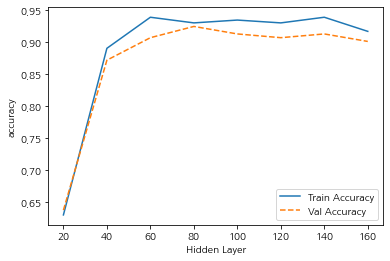

In [90]:
#모델 설명력 그래프 확인
plt.plot(para_hidden, train_accuracy, linestyle = "-", label = 'Train Accuracy')
plt.plot(para_hidden, val_accuracy, linestyle = "--", label = 'Val Accuracy')
plt.xlabel('Hidden Layer')
plt.ylabel('accuracy')
plt.legend()

은닉층 구조가 복잡할수록 모델 정확도는 향상됨 

In [91]:
# Activation 활성화함수 변경 
train_accuracy =[]; val_accuracy=[]

para_function=["logistic","tanh","relu"]

for v_function in para_function:
    nn=MLPClassifier(activation=v_function,random_state=1234)
    nn.fit(df_train_x,df_train_y)
    train_accuracy.append(nn.score(df_train_x,df_train_y))
    val_accuracy.append(nn.score(df_val_x,df_val_y))
#데이터 테이블로 저장 
df_accuracy_function=pd.DataFrame()
df_accuracy_function["ActivationFunction"]=para_function
df_accuracy_function["TrainAccuracy"]=train_accuracy
df_accuracy_function["ValAccuracy"]=val_accuracy

df_accuracy_function.round(3)

,ActivationFunction,TrainAccuracy,ValAccuracy
0,logistic,0.921,0.906
1,tanh,0.934,0.912
2,relu,0.934,0.912


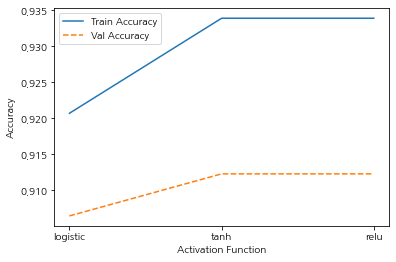

In [92]:
plt.plot(para_function,train_accuracy,linestyle="-",label="Train Accuracy")
plt.plot(para_function,val_accuracy,linestyle="--",label="Val Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Activation Function")
plt.legend()

relu 함수의 모델이 가장 높은 정확도를 보임

### scale변환 

In [93]:
v_feature_name = df_train_x.columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [94]:
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.3,
                                                     random_state = 1234)
df_scaled_train_x, df_scaled_val_x = train_test_split(df_scaled_train_x, test_size = 3/7,
                                                     random_state = 1234)
print("train data X size : {}".format(df_scaled_train_x.shape))
print("val data X size : {}".format(df_scaled_val_x.shape))
print("test data X size:{}".format(df_scaled_test_x.shape))

train data X size : (227, 30)
val data X size : (171, 30)
test data X size:(171, 30)


### scale조절후 MLPClassifier 모델 재실행

In [97]:
nn_scaled = MLPClassifier(random_state = 1234)
nn_scaled.fit(df_scaled_train_x, df_train_y)
print("Accuracy on training set:{:.3f}".format(nn_scaled.score(df_scaled_train_x, df_train_y)))
print("Accuracy on val set:{:.3f}".format(nn_scaled.score(df_scaled_val_x, df_val_y)))

Accuracy on training set:0.996
Accuracy on val set:0.959


/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [98]:
# Hidden Layer : 은닉층 변경 
train_accuracy = []; val_accuracy = []
para_hidden = [20 * hidden for hidden in range(1, 11)]

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes=(v_hidden,v_hidden), random_state=1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    val_accuracy.append(nn.score(df_scaled_val_x, df_val_y))
# 데이터 테이블로 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["Hidden Layer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["ValAccuracy"] = val_accuracy

/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [28]:
df_accuracy_hidden.round(3)

,Hidden Layer,TrainAccuracy,ValAccuracy
0,20,0.996,0.965
1,40,0.996,0.977
2,60,1.000,0.965
3,80,1.000,0.977
4,100,1.000,0.971
5,120,1.000,0.953
6,140,1.000,0.965
7,160,1.000,0.953
8,180,1.000,0.959
9,200,1.000,0.953


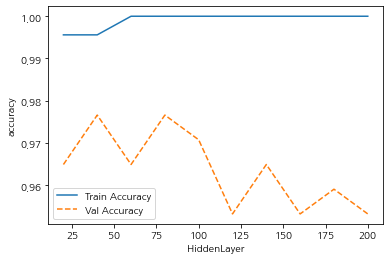

In [30]:
# 모델 정확도 그래프 확인
plt.plot(para_hidden, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_hidden, val_accuracy, linestyle="--", label="Val Accuracy")
plt.ylabel("accuracy"); plt.xlabel("HiddenLayer")
plt.legend()

위의 그래프의 경우 은닉층 구조가 복잡할 수록 모델의 정확도는 전반적으로 줄어드는 경향을 볼 수 있다. 

In [99]:
train_accuracy=[];val_accuracy=[]

para_function=["logistic","tanh","relu"]

for v_function in para_function :
    nn=MLPClassifier(activation=v_function,hidden_layer_sizes = (80,80),random_state=1234)
    nn.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    val_accuracy.append(nn.score(df_scaled_val_x,df_val_y))
#데이터 테이블로 저장
df_accuracy_function=pd.DataFrame()
df_accuracy_function['ActivarionFunction']=para_function
df_accuracy_function['TrainAccuracy']=train_accuracy
df_accuracy_function['ValAccuracy']=val_accuracy

/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [100]:
df_accuracy_function.round(3)

,ActivarionFunction,TrainAccuracy,ValAccuracy
0,logistic,0.996,0.965
1,tanh,1.000,0.959
2,relu,1.000,0.977


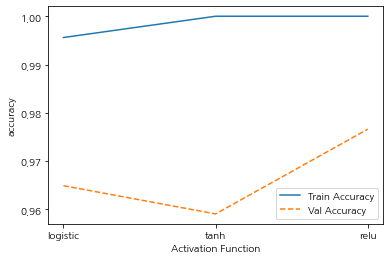

In [101]:
# Activation_function 별 정확도 그래프로 확인
plt.plot(para_function, train_accuracy, linestyle = "-", label = 'Train Accuracy')
plt.plot(para_function, val_accuracy, linestyle = '--', label = 'Val Accuracy')
plt.ylabel('accuracy'); plt.xlabel('Activation Function')
plt.legend()

In [35]:
activation = "relu" 

relu 함수의 경우 가장 높은 정확도를 보이는 것을 볼 수 있다. 

In [40]:
# train 및 test 정확도 결과 저장용
train_accuracy =[]; test_accuracy = []

para_solver = ["lbfgs","sgd","adam"]
for v_solver in para_solver :
    nn = MLPClassifier(solver = v_solver,activation = "relu",hidden_layer_sizes=(80,80),random_state =1234)
    nn.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x,df_test_y))
    
df_accuracy_solver = pd.DataFrame()
df_accuracy_solver["Solver"] = para_solver
df_accuracy_solver["TrainAccuracy"] = train_accuracy
df_accuracy_solver["TestAccuracy"] = test_accuracy

df_accuracy_solver.round(3)

/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Solver,TrainAccuracy,TestAccuracy
0,lbfgs,1.000,0.947
1,sgd,0.996,0.936
2,adam,1.000,0.947


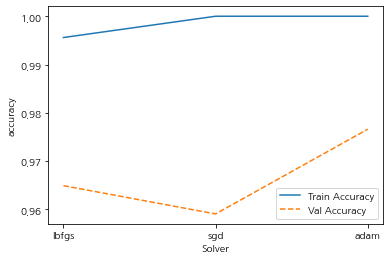

In [102]:
plt.plot(para_solver, train_accuracy, linestyle = "-", label = 'Train Accuracy')
plt.plot(para_solver, val_accuracy, linestyle = '--', label = 'Val Accuracy')
plt.ylabel('accuracy'); plt.xlabel('Solver')
plt.legend()

adam 최적화 모델이 가장 높은 정확도를 보인다.

In [41]:
solver ="adam"

In [46]:
# Mini Batch 변경
train_accuracy=[];val_accuracy=[]

para_batch=[20 * batch for batch in range(1,10)]

for v_batch in para_batch :
    nn=MLPClassifier(batch_size = v_batch, solver = "adam", activation ="relu", hidden_layer_sizes = (80,80),random_state=1234)
    nn.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    val_accuracy.append(nn.score(df_scaled_val_x,df_val_y))
#데이터 테이블로 저장
df_accuracy_batch=pd.DataFrame()
df_accuracy_batch['Mini Batch']=para_batch
df_accuracy_batch['TrainAccuracy']=train_accuracy
df_accuracy_batch['ValAccuracy']=val_accuracy

df_accuracy_batch.round(3)

,Mini Batch,TrainAccuracy,ValAccuracy
0,20,1.0,0.971
1,40,1.0,0.971
2,60,1.0,0.971
3,80,1.0,0.971
4,100,1.0,0.977
5,120,1.0,0.971
6,140,1.0,0.971
7,160,1.0,0.971
8,180,1.0,0.965


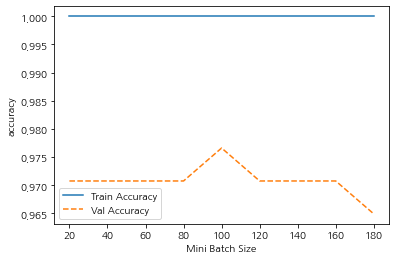

In [47]:
plt.plot(para_batch, train_accuracy, linestyle = "-", label = 'Train Accuracy')
plt.plot(para_batch, val_accuracy, linestyle = '--', label = 'Val Accuracy')
plt.ylabel('accuracy'); plt.xlabel('Mini Batch Size')
plt.legend()

train 데이터는 과적합되어있다.    
validation 데이터는 mini batch size가 커질수록 정확도가 전반적으로 낮아지는 추세임을 볼수있다.

In [48]:
# 최종모델선택
nn_final = MLPClassifier(hidden_layer_sizes = (80,80), activation = "relu", solver = "adam", batch_size=100, random_state = 1234)
nn_final.fit(df_scaled_train_x, df_train_y)
# 평가
y_pred = nn_final.predict(df_scaled_test_x)
# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}" .format(nn_final.score(df_scaled_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f} \n" .format(nn_final.score(df_scaled_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n {}" .format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 1.000
Accuracy on test set: 0.947 

Confusion matrix: 
 [[103   2]
 [  7  59]]


테스트셋의 정확도 = 1 (=100%)  
정분류율 = (103 + 59)/(103 + 2 + 7 + 59) = 0.947 (=94.7%)    
오분류율 = 1 - 0.947 = 0.052 (=5.2%)  
F1 Score = 2 / {(1/정밀도)+(1/재현율)}= 2 / { (1/ (59/61)) + (1/ (59/66)) }   
=0.928(=92.8%)

# knn 분석

In [52]:
df_raw= pd.read_csv("data/유방암.csv",engine = "python")
df_raw.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


유방암 데이터를 이용하여 k(이웃 수)가 3~30까지 변화할 때까지 정확도(accuracy)의 변화를 그림으로 나타내고 predict method를 이용하여 예측값을 구해라. 그리고 실제값과의 정확도와 confusion matrix를 구해라.
데이터 : 유방암.CSV(변수: 31개, 자료 수: 569개)
 -.목표변수(diagnosis, 0: Malignant(악성,357개), 1: Benign(양성,212개)  
 
※ 데이터는 ( train(0.4) : validation(0.3) : test(0.3) )의 비율로 분할
 1. train 데이터: 모델 훈련
 2. validation 데이터: 최적의 parameter 찾기([연습]에서 test 데이터 역할)
 3. test 데이터: 2에서 찾은 최적의 parameter를 이용하여 만든 모델로 최종 성능 확인(단 한 번만 사용할 것) 

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [54]:
df_raw.shape

(569, 31)

In [59]:
df_raw_x =df_raw.drop("diagnosis",axis=1, inplace=False)
df_raw_y =df_raw["diagnosis"]

In [60]:
# 데이터분할 4:3:3
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,df_raw_y,test_size = 3/10,random_state =1234)
df_train_x, df_val_x, df_train_y, df_val_y = train_test_split(df_train_x,df_train_y,test_size = 3/7,random_state =1234)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("val data X size : {}".format(df_val_x.shape))
print("val data Y size : {}".format(df_val_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (227, 30)
train data Y size : (227,)
val data X size : (171, 30)
val data Y size : (171,)
test data X size : (171, 30)
test data Y size : (171,)


In [61]:
#KNN 모델 생성(default 설정)
knn_uncustomized = KNeighborsClassifier()
knn_uncustomized.fit(df_train_x, df_train_y)
#train 데이터 셋 정확도
print("Accuracy on training set:{:.3f}".format(knn_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on val set:{:.3f}".format(knn_uncustomized.score(df_val_x, df_val_y)))

Accuracy on training set:0.956
Accuracy on val set:0.918


In [62]:
knn_uncustomized

KNeighborsClassifier()

In [63]:
train_accuracy = []; val_accuracy = []
para_n_neighbors = [i for i in range(3,30)]

for v_n_neighbors in para_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    val_accuracy.append(knn.score(df_val_x, df_val_y))

#데이터 테이블로 저장
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors["Neighbors"] = para_n_neighbors
df_accuracy_neighbors["TrainAccuacy"] = train_accuracy
df_accuracy_neighbors["ValAccuacy"] = val_accuracy
df_accuracy_neighbors.round(3)

,Neighbors,TrainAccuacy,ValAccuacy
0,3,0.960,0.918
1,4,0.952,0.924
2,5,0.956,0.918
3,6,0.943,0.918
4,7,0.960,0.918
5,8,0.952,0.924
6,9,0.952,0.924
7,10,0.943,0.918
8,11,0.947,0.918
9,12,0.925,0.912


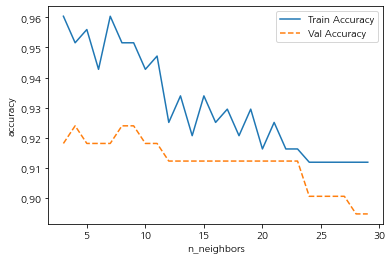

In [65]:
plt.plot(para_n_neighbors, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_n_neighbors, val_accuracy, linestyle="--", label="Val Accuracy")
plt.ylabel("accuracy");plt.xlabel("n_neighbors")
plt.legend()

# n_neighbors = 4

군집수가 증가할수록 train data의 정확도가 줄어들며, 군집 25개 이상에서는 정확도가 일정함을 볼수 있다.  
validation data의 경우 군집의 수가 증가할 수록 줄어드는 경향을 볼 수 있다.  

In [67]:
train_accuracy = []
val_accuracy =[]
#이웃 수
para_n_neighbors = [i for i in range(1,11)]*2
#가중치(uniform, distance)
para_weights = (["uniform"]) * 10 + (["distance"] * 10 )
#zip(list1, list2, ...)를 사용하면 list1과 list2의 인덱스별 값을 하나씩 가져옴
#1번 loop: n_neighbors = para_n_neighbors[0], weights =para_weights[0]
#2번 loop: n_neighbors = para_n_neighbors[1], weights =para_weights[1]

for (v_n_neighbors, v_weights) in zip(para_n_neighbors , para_weights):
    knn = KNeighborsClassifier(n_neighbors= v_n_neighbors, weights= v_weights)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x,df_train_y))
    val_accuracy.append(knn.score(df_val_x, df_val_y))

df_accuracy_weights = pd.DataFrame()
df_accuracy_weights["Neighbors"] = para_n_neighbors
df_accuracy_weights["Weights"] = para_weights
df_accuracy_weights["TrainAccuracy"] = train_accuracy
df_accuracy_weights["ValAccuracy"] = val_accuracy
df_accuracy_weights.round(3)

,Neighbors,Weights,TrainAccuracy,ValAccuracy
0,1,uniform,1.000,0.901
1,2,uniform,0.965,0.906
2,3,uniform,0.960,0.918
3,4,uniform,0.952,0.924
4,5,uniform,0.956,0.918
5,6,uniform,0.943,0.918
6,7,uniform,0.960,0.918
7,8,uniform,0.952,0.924
8,9,uniform,0.952,0.924
9,10,uniform,0.943,0.918


In [69]:
#그림을 그리기 위해 데이터의 형태를 변환
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index = 'Neighbors', columns = 'Weights',\
                                                      values = ['TrainAccuracy', 'ValAccuracy'])
df_accuracy_weights_pivot

#pivot을 이용할 경우, columns와 values이 2개의 level로 이루어지므로 하나의 level로 변환
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns = level0 + '_' + level1
df_accuracy_weights_pivot.head()

,TrainAccuracy_distance,TrainAccuracy_uniform,ValAccuracy_distance,ValAccuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.900585,0.900585
2,1.0,0.964758,0.900585,0.906433
3,1.0,0.960352,0.923977,0.918129
4,1.0,0.951542,0.918129,0.923977
5,1.0,0.955947,0.912281,0.918129


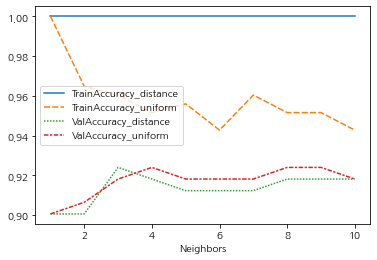

In [104]:
sns.lineplot(data = df_accuracy_weights_pivot)

가중치 distance일때, train 데이터의 모델의 정확도는 1로 과대적합되어있음을 볼수있다.  
weights = uniform으로 지정 

In [70]:
train_accuracy=[];val_accuracy=[]

# 이웃수
para_n_neighbors = [i for i in range(1,11)]*3

# 거리계산 방법 (minkowki,euclidean,manhattan )
para_metric = ["minkowski"]*10 + ["euclidean"]*10 + ["manhattan"]*10

for (v_n_neighbors,v_metric) in zip(para_n_neighbors, para_metric):
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors, metric = v_metric, weights='uniform')
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    val_accuracy.append(knn.score(df_val_x, df_val_y))
    
    
# 데이터 테이블 저장
df_accuracy_metric = pd.DataFrame()
df_accuracy_metric["Neighbors"] = para_n_neighbors
df_accuracy_metric["Metric"] = para_metric
df_accuracy_metric["TrainAccuracy"] = train_accuracy
df_accuracy_metric["ValAccuracy"] = val_accuracy
df_accuracy_metric.round(3)

,Neighbors,Metric,TrainAccuracy,ValAccuracy
0,1,minkowski,1.000,0.901
1,2,minkowski,0.965,0.906
2,3,minkowski,0.960,0.918
3,4,minkowski,0.952,0.924
4,5,minkowski,0.956,0.918
5,6,minkowski,0.943,0.918
6,7,minkowski,0.960,0.918
7,8,minkowski,0.952,0.924
8,9,minkowski,0.952,0.924
9,10,minkowski,0.943,0.918


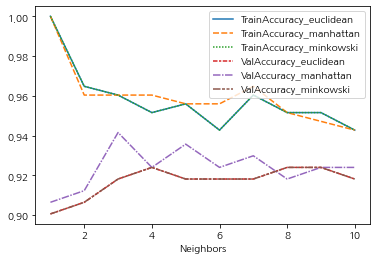

In [71]:
#정확도 그래프
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index="Neighbors",columns="Metric",
                                                   values=["TrainAccuracy","ValAccuracy"])

level0=df_accuracy_metric_pivot.columns.get_level_values(0)
level1=df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns=level0+"_"+level1
sns.lineplot(data=df_accuracy_metric_pivot)

거리계산 방법별(minkowki,euclidean,manhattan)이웃 수 증가에 따른 정확도 변화가 이웃수 4이상에서 거의 증가하지 않음을 볼수있다.

In [72]:
#최종모델
knn_model = KNeighborsClassifier(n_neighbors=4,weights="uniform",metric="euclidean")
knn_model.fit(df_train_x,df_train_y)
#평가
y_pred=knn_model.predict(df_test_x)

#train 데이터 셋 정확도
print("train data accuracy:{0:.3f}".format(knn_model.score(df_train_x,df_train_y)))
#test 데이터 셋 정확도
print("test data accuracy:{0:.3f}".format(knn_model.score(df_test_x,df_test_y)))
#confusion matrix
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

train data accuracy:0.952
test data accuracy:0.936
Confusion matrix:
[[103   2]
 [  9  57]]


테스트셋의 정확도 = 0.952 (=95.2%)  
정분류율 = (103 + 57)/(103 + 2 + 9 + 57) = 0.936 (=93.6%)    
오분류율 = 1 - 0.936 = 0.064 (=6.4%)  
F1 Score = 2 / {(1/정밀도)+(1/재현율)}= 2 / { (1/ (57/59)) + (1/ (57/66)) }   
=0.91(=91%)